
# <p style="text-align: center;">Unit 4: Case Study on Future Contract Rolling

### <p style="text-align: center;">Damon Resnick
#### <p style="text-align: center;">Collaborators: Rajni Goyal and Jim Hosker

### <p style="text-align: center;">February 8, 2018

<br>  
### <p style="text-align: center;">Abstract
<p style="text-align: justify;"> Future contract rolling is demostrated with python datareader and Series using a linear weighted rolling method. An example is shown using a proxy fund for the S&P 500 to roll two futures funds of the S&P 500 ESH8 rolled into ESM8 over a five and ten day period right before the expiry of the ESH8. The funds are extrapolated into the future using the proxy fund SPY of the S&P 500, and a simple linear weight method was used to roll ESH8 into ESM8 to better splice the two funds. The returns during the rolled period show a realistic estimate of the possible returns during that period, and the returns match well before and after the roll period.

<br>  
###   1 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Introduction

This case study focuses on the use of python datareader and Series to demostrate a simple example of future contract rolling. The funds chosen for this example are two proxy funds for the S&P 500 ESH8 rolled into ESM8.


#### What is a futures contract and does it really roll?
A future is a form of derivative contract that is an aggreement to take delivery of a particular asset on a specific date. Futures contracts on different asset classes are complicated by the time limited nature of the different futures contracts. The value of these contracts depends on many factors such as the value of the asset being traded and also on the time of the expiration date of the contract. The near contract, the one closest to expiring is the most liquid. If one wants to hold onto a contract but it is expiring then these near contracts can be transitioned from expiring contracts into the next or far contracts by a process called rolling. In order to do this one needs to compute a continous futures series from the individual near contract to the far contract, and this a rather complex undertaking requiring a great deal of knowdlege about the market and how assets are traded. Below a process for rolling these futures is described.  
  
Since this is a Jupyter notebook the code is included inline.  

 

In [1]:
# Importing python packages to run the code below
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from pandas_datareader import data as web
from pandas.tseries.offsets import BDay
from datetime import datetime
from pandas import Series
from pandas import read_csv

# Magics  to make the plots come out inline after the code
%matplotlib inline

###   2 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Future Contract Rolling
<br>
The prices for the SPY exchange-traded fund multiplied by 10 can be used as a proxy for the S&P 500 index.  
<br>
The adjusted price of the SPY is downloaded from the Yahoo Finance website and multiplied by 10.  

In [24]:
# Import data

# Load data from 2010 to current date.
start_dt = datetime(2010,1,4)
end_dt = datetime(2018,2,8)

# SPY times 10 is a proxy for the S&P 500 index.
stock = 'SPY'

px = web.get_data_yahoo(stock, start_dt, end_dt)['Adj Close'] * 10

#### Print out the basic statistics of the proxy SPY data as well as the head a tail of the data:

In [25]:
px.describe()

count    2040.000000
mean     1642.620874
std       493.873672
min       876.524200
25%      1170.581720
50%      1687.951580
75%      1991.827315
max      2865.799870
Name: Adj Close, dtype: float64

In [26]:
px.head()

Date
2010-01-04    963.41141
2010-01-05    965.96169
2010-01-06    966.64169
2010-01-07    970.72220
2010-01-08    973.95248
Name: Adj Close, dtype: float64

In [27]:
px.tail()

Date
2018-02-02    2754.50012
2018-02-05    2639.29993
2018-02-06    2691.30005
2018-02-07    2676.70013
2018-02-08    2576.30005
Name: Adj Close, dtype: float64

#### Plot the proxy data over the date range:

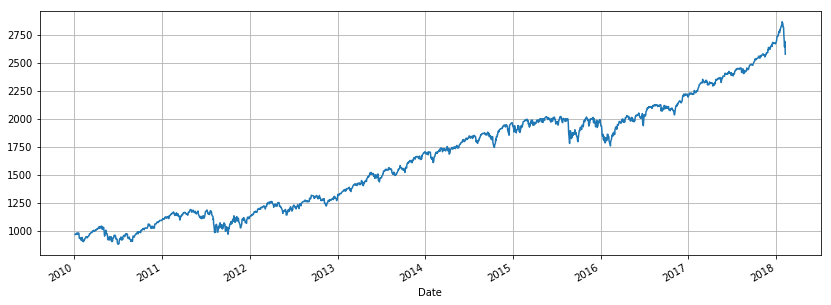

In [28]:
px.plot(grid = True, figsize = (14, 5))  # Plot the adjusted closing price of SPY

You can see that the S&P 500 has seen a steady upward trend since 2010, with some interesting dips in 2015 and 2016. It is now almost 300% its closing right before 2010. If you look closely at the dip down at the very end you can see last week's downward correction!
<br>   
For this is example we will roll the ESH8 futures fund which closes in March 2018 into the ESM8 fund which closes in June 2018. 
<br>
#### We create an expiry with both dates:

In [29]:
# Like the book we will look at the S&P 500 but look at two different future contracts, 
# ESH8 has an expiry in March 2018 and ESM8 in June 2018.
expiry = {'ESH8': datetime(2018, 3, 16), 'ESM8': datetime(2018, 6, 15)}
expiry = Series(expiry).sort_values()

In [30]:
expiry

ESH8   2018-03-16
ESM8   2018-06-15
dtype: datetime64[ns]

#### Create the near and far futures series
Using the values from the proxy SPY Yahoo! Finance prices along with a random walk and some noise to simulate the near and far contracts 200 days into the future:

In [31]:
np.random.seed(12347)
N = 200 # Number of days

# Generate some random numbers
walk = (np.random.randint(0, 200, size=N) - 100) * 0.25
perturb = (np.random.randint(0, 20, size=N) - 10) * 0.25

# Create the near and far series sets with the cumulitive sum of the random walk and perturb
walk = walk.cumsum()
rng = pd.date_range(px.index[0], periods=len(px) + N, freq='B') # Make sure the index matches the range

# The walk values are added to the proxy to get the near
near = np.concatenate([px.values, px.values[-1] + walk])

# Both walk and perturb values are added to the proxy to get the near
far = np.concatenate([px.values, px.values[-1] + walk + perturb])

# The prices data frame is created with the two funds in separate columns with the date as the index.
prices = pd.DataFrame({'ESH8': near, 'ESM8': far}, index=rng)

In [32]:
prices.describe()

,ESH8,ESM8
count,2240.000000,2240.000000
mean,1738.463992,1738.457854
std,562.638326,562.626338
min,876.524200,876.524200
25%,1192.757570,1192.757570
50%,1782.871245,1782.871245
75%,2097.843397,2097.843397
max,2899.800050,2897.800050


The two funds start out identical until November 2017.

In [33]:
prices.head()

,ESH8,ESM8
2010-01-04,963.41141,963.41141
2010-01-05,965.96169,965.96169
2010-01-06,966.64169,966.64169
2010-01-07,970.72220,970.72220
2010-01-08,973.95248,973.95248


In [34]:
prices.tail()

,ESH8,ESM8
2018-07-30,2605.55005,2607.30005
2018-07-31,2591.80005,2594.05005
2018-08-01,2599.80005,2601.55005
2018-08-02,2616.30005,2615.55005
2018-08-03,2596.30005,2594.05005


You can see that the prices don't match up at the tail of the two funds.

In [35]:
#prices.head(-180)

In [36]:
#prices

Below is a plot of the two funds projected into the future. They nearly overlap perfectly only deviating slightly at 100 days before the begining of February and into June. This prices dataframe now as two time series that only differ over a 300 day window by a small random amount.

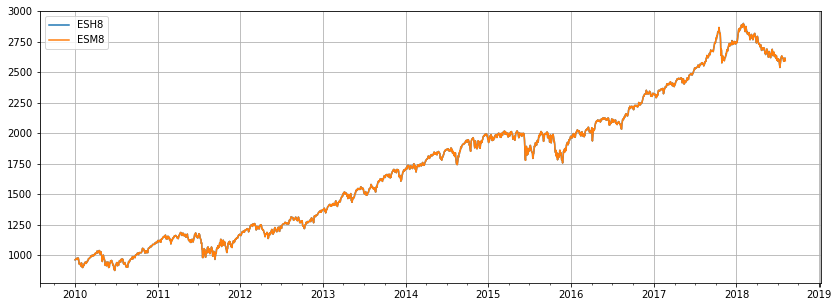

In [37]:
prices.plot(grid=True, figsize=(14, 5))

It is interesting to note the projection of the downward correction from the last few weeks from the begining of February 2018 and for the next 200 days.

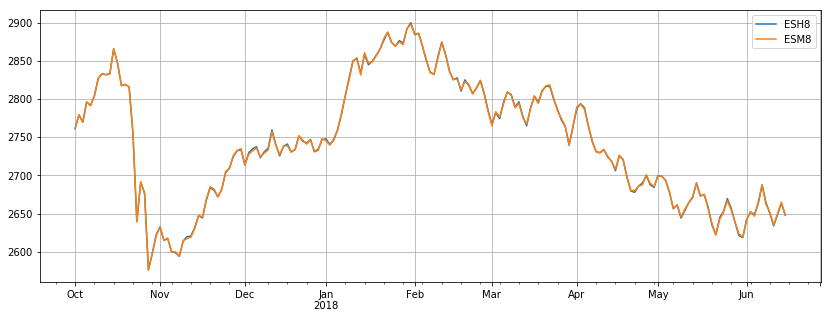

In [38]:
prices.loc['2017-10-01':'2018-06-17'].plot(grid=True, figsize=(14, 5))

If you look closely you can see the funds overlap perfectly until November and are then slight separated after that.

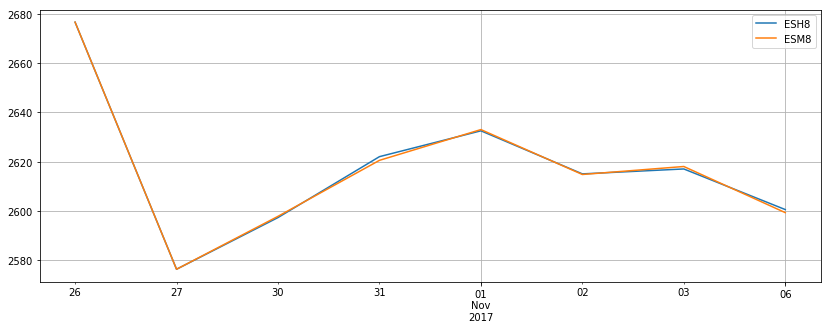

In [40]:
prices.loc['2017-10-26':'2017-11-06'].plot(grid=True, figsize=(14, 5))

### Weights
Now we will splice the two time series together using a linear weighting matrix with a default rolling period of a 5 day work week. This will simply weight the near contract the most at the start of the rolling period and weight the far contract the most at the end of the rolling period. Over the default of five days it would weight the two funds such that before the roll started the ESH8 would be weighted 1 and the ESM8 0 while on the first day the weight for ESH8 is 0.8 and ESM8 is 0.2, 0.6 and 0.4 on the second day, 0.4 and 0.6 the third day, 0.2 and 0.8 the fourth day, and 0 and 1 the fifth day.
<br>
- start : first date to compute weighting DataFrame
- expiry : Series of ticker -> expiration dates
- items : sequence of contract names
- roll_periods : default of 5

In [41]:
# Function that computes a weighting matrix with linear decay over a number of periods leading up to expiry:
def get_roll_weights(start, expiry, items, roll_periods = 5): 
    # start : first date to compute weighting DataFrame
    # expiry : Series of ticker -> expiration dates
    # items : sequence of contract names
    
    dates = pd.date_range(start, expiry[-1], freq =' B')
    weights = pd.DataFrame(np.zeros((len(dates), len(items))), index = dates, columns = items)
    
    prev_date = weights.index[0]
    
    for i, (item, ex_date) in enumerate(expiry.iteritems()):
        if i < len(expiry) - 1:
            weights.loc[prev_date:ex_date - pd.offsets.BDay(), item] = 1
            roll_rng = pd.date_range(end = ex_date - pd.offsets.BDay(), 
                                     periods = roll_periods + 1, freq =' B')
            decay_weights = np.linspace(0, 1, roll_periods + 1)
            weights.loc[roll_rng, item] = 1 - decay_weights
            weights.loc[roll_rng, expiry.index[i + 1]] = decay_weights
        else:
            weights.loc[ prev_date:, item] = 1
        prev_date = ex_date
    return weights


In [42]:
prices.columns

Index(['ESH8', 'ESM8'], dtype='object')

Below we create the weights as described for the 5 day roll period.

In [43]:
# Using a start of 6/1/2017 the expiry close dates and the ESH8 and ESM8 funds.
weights = get_roll_weights('6/1/2017', expiry, prices.columns, roll_periods = 5)

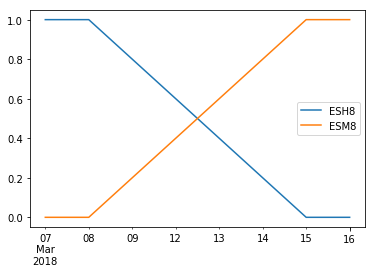

In [44]:
weights.loc['2018-03-07':'2018-03-17'].plot()

You can see that the weights always add up to 1 and ESH8 weight goes down right before the closing of that fund and is rolled into the ESM8 over a five day period.

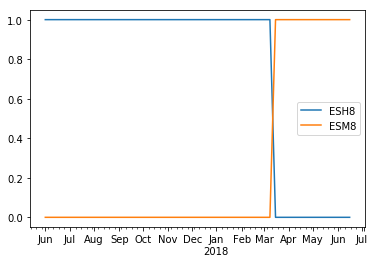

In [45]:
weights.plot()

You can see the weights always add up to one over an entire calendar year.

In [46]:
# Rolled future returns are just a weighted sum of the contract returns:
rolled_returns = (prices.pct_change() * weights).sum(1)

In [47]:
rolled_returns.describe()

count    272.000000
mean       0.000314
std        0.006135
min       -0.041823
25%       -0.003419
50%        0.000735
75%        0.004019
max        0.019702
dtype: float64

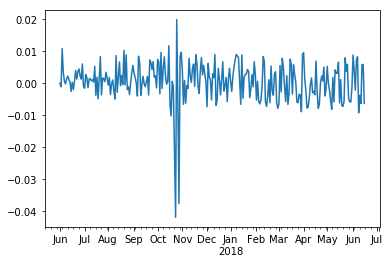

In [48]:
rolled_returns.plot()

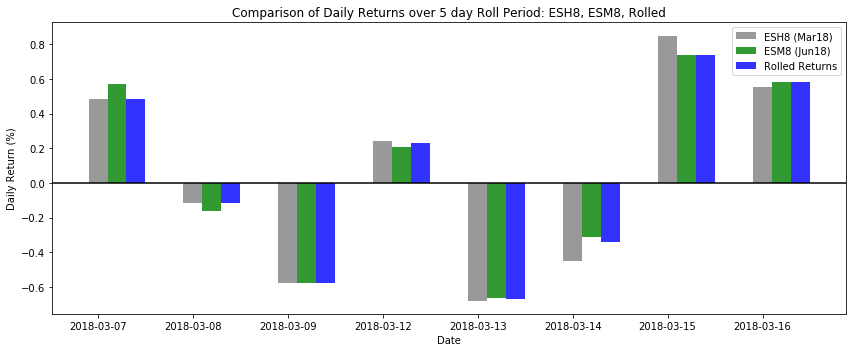

In [49]:
## Graph of returns for ESH8, ESM8 and weighted Roll
roll_days = 5
expiry_date_near = '2018-03-16'   ## expiry_date_U2
expiry_date_far = '2018-06-15'    ## expiry_date_Z2
ret_st_date = datetime.strptime(expiry_date_near, '%Y-%m-%d') - BDay(roll_days+2)
ret_end_date = datetime.strptime(expiry_date_near, '%Y-%m-%d')

dret_rolled = rolled_returns.loc[ret_st_date:ret_end_date]
dret_prices = prices.pct_change()

dret_near = dret_prices['ESH8'][ret_st_date:ret_end_date]
dret_far = dret_prices['ESM8'][ret_st_date:ret_end_date] 


## Bar chart of daily returns
plt.figure(num=1,figsize = (12,5))
plt.subplot(111)
bar_width = 0.2
opacity = 0.8
index = np.arange(roll_days+3)
f_near = plt.bar(index - bar_width, 100*dret_near.values, bar_width ,
                 alpha=opacity,
                 color='grey',
                 label='ESH8 (Mar18)')
f_far  = plt.bar(index, 100*dret_far.values, bar_width ,
                 alpha=opacity,
                 color='g',
                 label='ESM8 (Jun18)')
f_rolled = plt.bar(index + bar_width, 100*dret_rolled.values, bar_width ,
                 alpha=opacity,
                 color='b',
                 label='Rolled Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.title('Comparison of Daily Returns over 5 day Roll Period: ESH8, ESM8, Rolled')
plt.xticks(index-bar_width, dret_rolled.index.strftime('%Y-%m-%d'))
plt.legend()
plt.axhline(0, color='black')
plt.tight_layout()
plt.show()

If you look carefully you can see the weights reflected in the rolled returns. For instance on the 7th ESH8 is equal to the Rolled Returns while on the 16th the ESM8 is equal to the rolled returns. In between these two dates the weight average or rolled returns is a weighted average of the two determined by the weight of each on that particular day.

#### Rolled weights over a 10 day roll period:

In [50]:
# Using a start of 6/1/2017 the expiry close dates and the ESH8 and ESM8 funds.
weights10 = get_roll_weights('6/1/2017', expiry, prices.columns, roll_periods = 10)

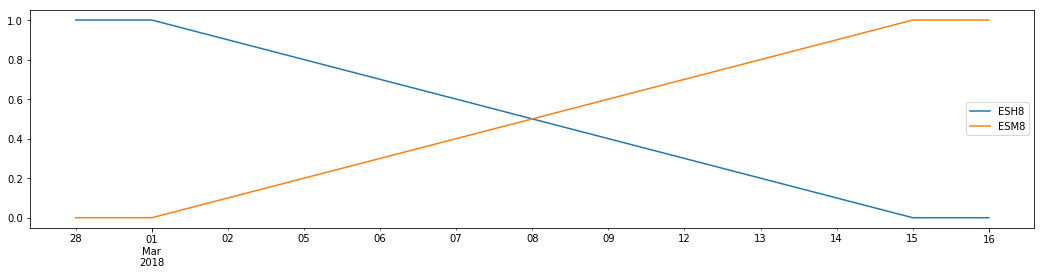

In [51]:
weights10.loc['2018-02-28':'2018-03-17'].plot(figsize=(18,4))

In [52]:
# Rolled future returns are just a weighted sum of the contract returns:
rolled_returns10 = (prices.pct_change() * weights).sum(1)

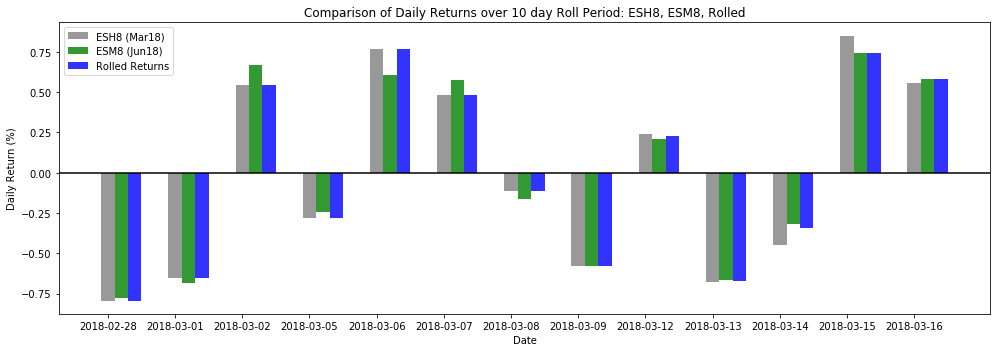

In [53]:
## Graph of returns for ESH8, ESM8 and weighted Roll
roll_days = 10
expiry_date_near = '2018-03-16'   ## expiry_date_U2
expiry_date_far = '2018-06-15'    ## expiry_date_Z2
ret_st_date = datetime.strptime(expiry_date_near, '%Y-%m-%d') - BDay(roll_days+2)
ret_end_date = datetime.strptime(expiry_date_near, '%Y-%m-%d')

dret_rolled = rolled_returns.loc[ret_st_date:ret_end_date]
dret_prices = prices.pct_change()

dret_near = dret_prices['ESH8'][ret_st_date:ret_end_date]
dret_far = dret_prices['ESM8'][ret_st_date:ret_end_date] 


## Bar chart of daily returns
plt.figure(num=1,figsize = (14,5))
plt.subplot(111)
bar_width = 0.2
opacity = 0.8
index = np.arange(roll_days+3)
f_near = plt.bar(index - bar_width, 100*dret_near.values, bar_width ,
                 alpha=opacity,
                 color='grey',
                 label='ESH8 (Mar18)')
f_far  = plt.bar(index, 100*dret_far.values, bar_width ,
                 alpha=opacity,
                 color='g',
                 label='ESM8 (Jun18)')
f_rolled = plt.bar(index + bar_width, 100*dret_rolled.values, bar_width ,
                 alpha=opacity,
                 color='b',
                 label='Rolled Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.title('Comparison of Daily Returns over 10 day Roll Period: ESH8, ESM8, Rolled')
plt.xticks(index-bar_width, dret_rolled.index.strftime('%Y-%m-%d'))
plt.legend()
plt.axhline(0, color='black')
plt.tight_layout()
plt.show()

As you can see, over a longer roll period of 10 days the rolled returns go from being equal to the ESH8 to finally being equal to the ESM8 values.

###   3 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Conclusion

Future contract rolling was demostrated with python datareader and Series using a linear weighted rolling method. An example was shown using a proxy fund for the S&P 500 to roll two futures funds of the S&P 500 ESH8 rolled into ESM8 over a five and ten day period right before the expiry of the ESH8. The funds were extrapolated into the future using the proxy fund SPY of the S&P 500, and a simple linear weight method was used to roll ESH8 into ESM8 to better splice the two funds.
<br>  
The returns during the rolled period show a realistic estimate of the possible returns during that period. And the returns match well before and after the roll period.